In [1]:
!pip install wordcloud
!pip install folium
!pip install sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
datafile=pd.read_csv('/home/ec2-user/allmonthsdatafinal.csv')

In [3]:
datafile.head()

,ride_id,rideable_type,started_at_date,started_at_time,ended_at_date,ended_at_time,time_of_ride,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,937DC7C2109D635C,electric_bike,12/1/2021,12:00:01 AM,12/1/2021,12:23:16 AM,00:23:15,NaN,NaN,41.93000,-87.73000,41.88000,-87.71000,casual,NaN,NaN,NaN,NaN,NaN
1,0CD83C3FE35E69A0,classic_bike,12/1/2021,12:00:03 AM,12/1/2021,12:07:34 AM,00:07:31,State St & Kinzie St,St. Clair St & Erie St,41.88919,-87.62775,41.89435,-87.62280,casual,NaN,NaN,NaN,NaN,NaN
2,FC2D02B730EBC33D,electric_bike,12/1/2021,12:00:15 AM,12/1/2021,12:02:40 AM,00:02:25,Wells St & Huron St,NaN,41.89476,-87.63459,41.90000,-87.64000,member,NaN,NaN,NaN,NaN,NaN
3,227558BB46C7DE48,electric_bike,12/1/2021,12:01:00 AM,12/1/2021,12:05:29 AM,00:04:29,NaN,NaN,41.79000,-87.60000,41.80000,-87.60000,member,NaN,NaN,NaN,NaN,NaN
4,5CB387082B4310B2,classic_bike,12/1/2021,12:03:44 AM,12/1/2021,12:07:44 AM,00:04:00,Ellis Ave & 60th St,University Ave & 57th St,41.78510,-87.60107,41.79148,-87.59986,member,NaN,NaN,NaN,NaN,NaN


In [4]:
len(datafile)

1200000

In [5]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1200000 non-null  object 
 1   rideable_type       1200000 non-null  object 
 2   started_at_date     1200000 non-null  object 
 3   started_at_time     1200000 non-null  object 
 4   ended_at_date       1200000 non-null  object 
 5   ended_at_time       1200000 non-null  object 
 6   time_of_ride        1200000 non-null  object 
 7   start_station_name  1035381 non-null  object 
 8   end_station_name    1033906 non-null  object 
 9   start_lat           1200000 non-null  float64
 10  start_lng           1200000 non-null  float64
 11  end_lat             1199332 non-null  float64
 12  end_lng             1199332 non-null  float64
 13  member_casual       1200000 non-null  object 
 14  Unnamed: 14         0 non-null        float64
 15  Unnamed: 15    

In [6]:
datafile.describe()

,start_lat,start_lng,end_lat,end_lng,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,1.200000e+06,1.200000e+06,1.199332e+06,1.199332e+06,0.0,0.0,0.0,0.0,0.0
mean,4.189974e+01,-8.764810e+01,4.189989e+01,-8.764824e+01,NaN,NaN,NaN,NaN,NaN
std,4.725555e-02,3.221943e-02,4.722291e-02,2.971153e-02,NaN,NaN,NaN,NaN,NaN
min,4.164000e+01,-8.784000e+01,4.155000e+01,-8.789000e+01,NaN,NaN,NaN,NaN,NaN
25%,4.188000e+01,-8.766357e+01,4.188000e+01,-8.766260e+01,NaN,NaN,NaN,NaN,NaN
50%,4.189691e+01,-8.764421e+01,4.189745e+01,-8.764435e+01,NaN,NaN,NaN,NaN,NaN
75%,4.192889e+01,-8.762963e+01,4.192914e+01,-8.762963e+01,NaN,NaN,NaN,NaN,NaN
max,4.563503e+01,-7.379648e+01,4.212000e+01,-8.730000e+01,NaN,NaN,NaN,NaN,NaN


In [7]:
datafile.shape

(1200000, 19)

In [8]:
datafile=datafile.drop('Unnamed: 14',axis=1)
datafile=datafile.drop('Unnamed: 15',axis=1)
datafile=datafile.drop('Unnamed: 16',axis=1)
datafile=datafile.drop('Unnamed: 17',axis=1)
datafile=datafile.drop('Unnamed: 18',axis=1)

In [9]:
print(datafile.isnull().sum())

ride_id                    0
rideable_type              0
started_at_date            0
started_at_time            0
ended_at_date              0
ended_at_time              0
time_of_ride               0
start_station_name    164619
end_station_name      166094
start_lat                  0
start_lng                  0
end_lat                  668
end_lng                  668
member_casual              0
dtype: int64


In [10]:
# Replacing NA values with mode value of its respective column
datafile['start_station_name'] = datafile['start_station_name'].fillna(datafile['start_station_name'].mode()[0])
datafile['end_station_name'] = datafile['end_station_name'].fillna(datafile['end_station_name'].mode()[0])
datafile['end_lat'] = datafile['end_lat'].fillna(datafile['end_lat'].mode()[0])
datafile['end_lng'] = datafile['end_lng'].fillna(datafile['end_lng'].mode()[0])

In [11]:
#Checking if all NA values are filled:
print(datafile.isnull().sum())

ride_id               0
rideable_type         0
started_at_date       0
started_at_time       0
ended_at_date         0
ended_at_time         0
time_of_ride          0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [12]:
datafile = datafile.drop_duplicates()

In [13]:
len(datafile)

1100000

In [14]:
# Creating new column 'rideable_type_value' which stores the categorical variable(rideable_type) as a numeric value
datafile['rideable_type_value'] = datafile['rideable_type'].replace({'classic_bike': 0,'electric_bike': 1, 'docked_bike': 2})
datafile[['rideable_type','rideable_type_value']].head()

,rideable_type,rideable_type_value
0,electric_bike,1
1,classic_bike,0
2,electric_bike,1
3,electric_bike,1
4,classic_bike,0


In [15]:
# creating a new column 'weekday' which can used later for exploratory data analysis
datafile['weekday'] = pd.to_datetime(datafile['started_at_date']).dt.day_name()
datafile[['started_at_date','weekday']].head()

,started_at_date,weekday
0,12/1/2021,Wednesday
1,12/1/2021,Wednesday
2,12/1/2021,Wednesday
3,12/1/2021,Wednesday
4,12/1/2021,Wednesday


In [16]:
def haversine(start_lat, start_lng, end_lat, end_lng):
    # Convert decimal degrees to radians
    start_lat, start_lng, end_lat, end_lng = map(np.radians, [start_lat, start_lng, end_lat, end_lng])
    
    # Haversine formula
    d_lat = end_lat - start_lat
    d_lng = end_lng - start_lng
    a = np.sin(d_lat/2)**2 + np.cos(start_lat) * np.cos(end_lat) * np.sin(d_lng/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 
    return c * r

datafile['distance_in_km']=haversine(datafile['start_lat'],datafile['start_lng'],datafile['end_lat'],datafile['end_lng'])
datafile[['ride_id','distance_in_km']].head()

,ride_id,distance_in_km
0,937DC7C2109D635C,5.800886
1,0CD83C3FE35E69A0,0.705045
2,FC2D02B730EBC33D,0.734842
3,227558BB46C7DE48,1.111949
4,5CB387082B4310B2,0.716482


In [17]:
# Detecting outliers and removing them
lat_mean, lng_mean = datafile['start_lat'].mean(), datafile['start_lng'].mean()
lat_std, lng_std = datafile['start_lat'].std(), datafile['start_lng'].std()

df_filtered = datafile[(np.abs(datafile['start_lat'] - lat_mean) < 6 * lat_std) & 
                 (np.abs(datafile['start_lng'] - lng_mean) < 6 * lng_std)]

print(f"Original DataFrame length: {len(datafile)}")
print(f"Filtered DataFrame length: {len(df_filtered)}")

Original DataFrame length: 1100000
Filtered DataFrame length: 1099999


In [18]:
skew=datafile.skew(numeric_only=True)
skew

start_lat                0.052169
start_lng               72.333906
end_lat                 -0.425110
end_lng                 -0.959380
rideable_type_value      0.386964
distance_in_km         145.766987
dtype: float64

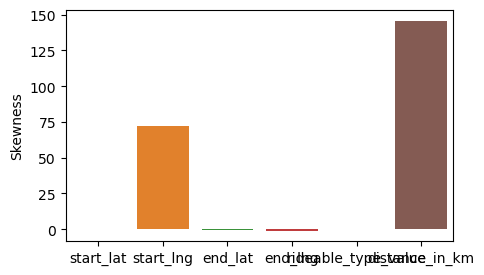

In [19]:
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(5,3))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.show()

(-0.5, 299.5, 99.5, -0.5)

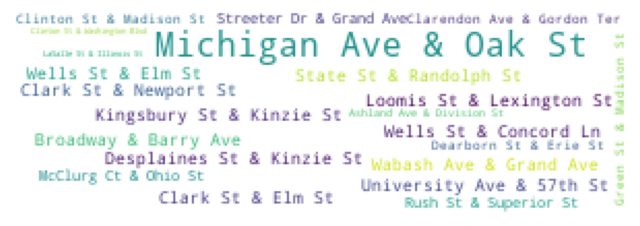

In [20]:
from wordcloud import WordCloud as wd
end_station_data = datafile["end_station_name"].value_counts()
wordcloud = wd(width=300,height=100,background_color="white").generate_from_frequencies(end_station_data)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

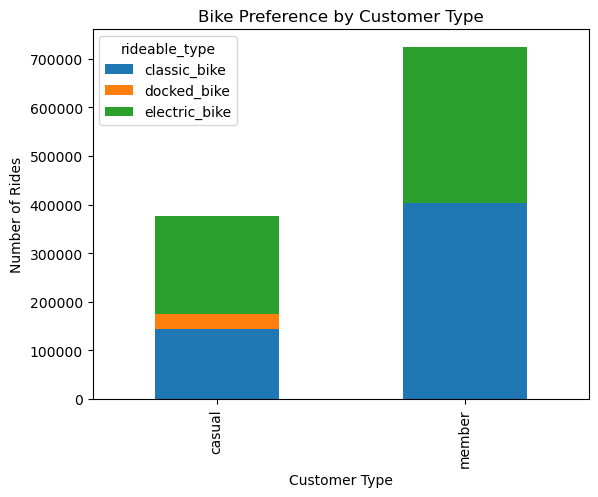

In [21]:
# Group the data by member/casual and bike type, then count the number of occurrences
bike_preference = datafile.groupby(['member_casual', 'rideable_type']).size().unstack()
bike_preference.plot(kind='bar', stacked=True)
plt.xlabel('Customer Type')
plt.ylabel('Number of Rides')
plt.title('Bike Preference by Customer Type')
plt.show()

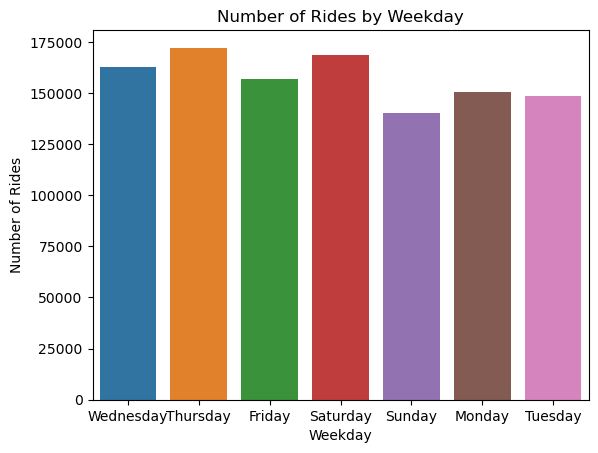

In [22]:
sns.countplot(x='weekday', data=datafile)
plt.title('Number of Rides by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.show()

<AxesSubplot: >

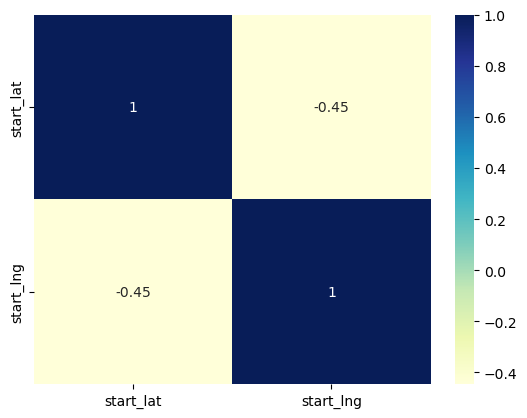

In [23]:
corr_matrix = datafile[['start_lat', 'start_lng']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

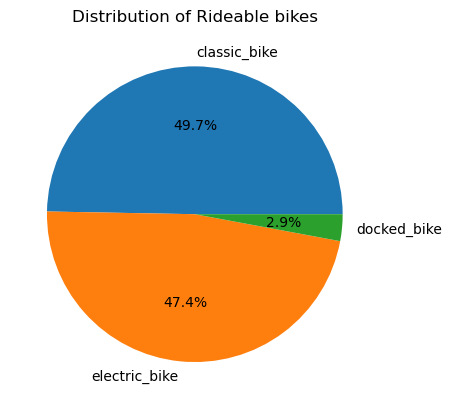

In [24]:
ride_counts = datafile['rideable_type'].value_counts()
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Rideable bikes")
plt.show()

In [27]:
import boto3
from io import StringIO

s3 = boto3.resource('s3')
bucket_name = 'bigdatadataset-bikesharing'
bucket = s3.Bucket(bucket_name)

csv_buffer = StringIO()
datafile.to_csv(csv_buffer, index=False)

s3_path = 'modifiedallmonthsdata.csv' 
bucket.put_object(Key=s3_path, Body=csv_buffer.getvalue())

s3.Object(bucket_name='bigdatadataset-bikesharing', key='modifiedallmonthsdata.csv')

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:

df = datafile.copy()
df['started_at_date'] = pd.to_datetime(df['started_at_date'])
df['month'] = df['started_at_date'].dt.month
df['year'] = df['started_at_date'].dt.year
df['rideable_type'] = df['rideable_type'].replace({'classic_bike': 0, 'electric_bike': 1,'docked_bike':2})

X = df[['month', 'year']]
y = df['rideable_type']
rfc = RandomForestClassifier()
rfc.fit(X, y)

future_months = pd.date_range(start='2022-10-01', end='2027-09-01', freq='MS')
future_data = pd.DataFrame({'month': future_months.month, 'year': future_months.year})

predictions = rfc.predict(future_data)
predicted_bike_type = 'electric' if sum(predictions) > len(predictions) / 2 else 'casual'

print(f"The preferred bike type for the next 5 years is {predicted_bike_type}.")
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")

The preferred bike type for the next 5 years is casual.
The accuracy of the model is: 0.5828590909090909


In [33]:
from sklearn.cluster import KMeans

In [35]:
# Predicting the most demandable locations using kmeans
data = datafile.copy()

cols = ['start_lat', 'start_lng', 'start_station_name']
df = data[cols]

grouped = df.groupby('start_station_name').agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_name': 'first'})
kmeans = KMeans(n_clusters=10).fit(grouped[['start_lat', 'start_lng']])
grouped['cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

import folium

m = folium.Map(location=[grouped['start_lat'].mean(),
                          grouped['start_lng'].mean()],
               zoom_start=12)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

for i in range(len(cluster_centers)):
    folium.CircleMarker(location=[cluster_centers[i][0], cluster_centers[i][1]],
                        radius=50,
                        color=colors[i],
                        fill=True,
                        fill_color=colors[i],
                        fill_opacity=0.5).add_to(m)
m

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
#optimizing the above model to improve the calculation of hotspots
data = df_filtered.copy()

cols = ['start_lat', 'start_lng', 'start_station_name']
df = data[cols]

grouped = df.groupby('start_station_name').agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_name': 'first'})
kmeans = KMeans(n_clusters=10).fit(grouped[['start_lat', 'start_lng']])
grouped['cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

m = folium.Map(location=[grouped['start_lat'].mean(), grouped['start_lng'].mean()], zoom_start=12)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']
for i in range(len(cluster_centers)):
    center_lat, center_lng = cluster_centers[i]
    
    folium.CircleMarker(location=[center_lat, center_lng],
                        radius=50,
                        color=colors[i % len(colors)],
                        fill=True,
                        fill_color=colors[i % len(colors)],
                        fill_opacity=0.5).add_to(m)
    
    cluster_group = grouped[grouped['cluster'] == i]
    for _, row in cluster_group.iterrows():
        folium.Marker(location=[row['start_lat'], row['start_lng']],
                      popup=row['start_station_name'],
                      icon=folium.Icon(color=colors[i % len(colors)])).add_to(m)

m

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
